## Part 1: Data scraping and preparation

### Step 1: Scrape your competitor's data (10 pts)

(a)

In [164]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from urllib.request import urlopen, Request

hdr = {'User-Agent': 'Safari/13.1'}
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares", headers=hdr)
soup = BeautifulSoup(r.content, 'html')
SpaceWeatherLive_table = soup.find("table", { "class" : "table table-striped table-responsive-md" })
df = pd.read_html(str(SpaceWeatherLive_table))[0]
df.rename(columns = {'Unnamed: 0':'rank','Unnamed: 1':'x_classification','Unnamed: 2':'date','Region':'region','Start':'start_time','Maximum':'max_time','End':'end_time','Unnamed: 7':'movie'}, inplace = True)
df.index += 1

(b)

In [165]:
df

,rank,x_classification,date,region,start_time,max_time,end_time,movie
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


(c)

I first imported all the packages I needed to do this step. 'hdr' was used as a way to bypass the restriction on SpaceWeatherLive.com so that I could access the contents of the webpage. I then melted the contents into a more readable format through beautifulsoup before finding the 'Top 50 solar flares' table and using pandas to create a dataframe called 'df 'of the table. I then renamed the column variables from 'Unnamed :  x" to their apporpriate names mentioned in the instructions of the assignment and incremented all the indexes by 1 to make it more consistent with the rank.

### Step 2: Tidy the top 50 solar flare data (10 pts)

 (a)

In [166]:
df = df.drop(labels= 'movie', axis=1)
df = df[['rank','x_classification','date','start_time','max_time','end_time','region']]

from datetime import datetime

for i,row in df.iterrows():
    #access data using column names
    start = row[2] + " " + row[3]
    max1 = row[2] + " " + row[4]
    end = row[2] + " " + row[5]
    df.at[i, 'date'] = datetime.strptime(start, '%Y/%m/%d %H:%M')
    df.at[i,'start_time'] = datetime.strptime(max1, '%Y/%m/%d %H:%M')
    df.at[i,'max_time'] = datetime.strptime(end, '%Y/%m/%d %H:%M')
    if row[6] == '-':
        df.at[i,'region'] = np.nan

df = df.drop(labels= 'end_time', axis=1)

df = df.rename(columns = {'date':'start_datetime','start_time':'max_datetime','max_time':'end_datetime'})


(b)

In [167]:
df

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


 (c)

 I first dropped the movie section and reordered the names so that region would be the last column on 'df'.  Using a for loop, I then combined the values in the date column with the start_time column, max_time column, and the end_time column, changed them to datetime format and put them in the date column, the start_time column, and the max_time column respectively. I also made sure that any region that did not have a value was changed to 'NaN'. I dropped the end_time column and renamed the date column to start_datetime, the start_time column to max_datetime, and the max_time column to end_datetime.

### Step 3: Scrape the NASA data (15 pts)

(a)

In [186]:
hdr2 = {'User-Agent': 'Safari/13.1'}
r2 = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html", headers=hdr2)
soup2 = BeautifulSoup(r2.content, 'html')
soup2.prettify()
Nasa_table = soup2.find("pre")

text = soup2.find("pre").get_text().splitlines()
plot = []
l = []
j = 0
for i in range(12,530):
    l.append(str(text[i]).split(" "))
    while '' in l[j]: l[j].remove('')
    while len(l[j]) > 14:
        if len(l[j]) == 15:
            plot.append(l[j].pop())
        else:
            l[j].pop()
    j += 1
j = 0
df2 = pd.DataFrame(l, columns = ['start_date', 'start_time', 'end_date','end_time', 'start_frequency', 'end_frequency', 'flare_location', 
                    'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'
                                ])


 (b)

In [187]:
df2

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


 (c)

 'hdr2' was used as a way to bypass the restriction on nasa.gov so that I could access the contents of the webpage. I then melted the contents into a more readable format through beautifulsoup before finding the Nasa table of solar flare data and using pandas to create a dataframe called 'df2' of the table. To create the table, I used a for loop that read and processed the lines and put them into a list called 'l'. I seperated the data using the '.split(" ")' command and removed any empty elements that the '.split(" ") command may have accidently picked up. If the line contained more than 14 columns, I removed the extra columns.  I then set the column names to the ones mentioned in the instructions of the assignment.  I used the 'plot' list as a way of gathering extra data that will be used later on in this assignment.

### Step 4: Tidy the NASA table (15 pts)

(a)

In [188]:
df2 = df2.replace('^(-).*(-)$', np.nan,regex=True)
df2 = df2.replace('????', np.nan)
df2 = df2.replace('BACK', np.nan)
df2 = df2.replace('Back', np.nan)
df2 = df2.replace('Back?',np.nan)
df2 = df2.replace('DIM', np.nan)
df2 = df2.replace('FILA',np.nan)
df2 = df2.replace('altr', np.nan)
df2 = df2.replace('DSF', np.nan)
cpa = df2['cme_angle'].to_numpy().copy()

is_halo = cpa.copy()
for i in range(is_halo.size):
    if is_halo[i] != "Halo":
        is_halo[i] = False
    else:
        is_halo[i]= True
        cpa[i] = np.nan
width = df2['cme_width'].to_numpy()       
width_lower_bound = width.copy()

for i in range(width.size):
    if type(width[i]) == str and len(re.findall(">", width[i])) > 0: 
        w = str(width[i])
        w = w[1:len(w)]
        width[i] = w
        width_lower_bound[i] = True
    else:
        width_lower_bound[i] = False

from datetime import timedelta  
for i,row in df2.iterrows():
    #access data using column names
    if row[1][0:2] == "24":
        start = str(row[0] + " " + "00:" + row[1][3:6]) 
        start_datetime = datetime.strptime(start, '%Y/%m/%d %H:%M') +  timedelta(days=1)  
    elif row[1][0:2] != "24":
        start = row[0] + " " + row[1] 
        start_datetime = datetime.strptime(start, '%Y/%m/%d %H:%M')
    
    if row[3][0:2] == "24":
        end = row[0][0:5] + row[2] + " " + "00:" + row[3][3:6]
        end_datetime = datetime.strptime(end, '%Y/%m/%d %H:%M') + timedelta(days=1) 
    elif row[3][0:2] != "24":
        end = row[0][0:5] + row[2] + " " + row[3]
        end_datetime = datetime.strptime(end, '%Y/%m/%d %H:%M')

    if type(row[10]) != float and row[10][0:2] == "24":
        cme = row[0][0:5] + row[9]+ " " + "00:" + row[10][3:6]
        cme_datetime = datetime.strptime(cme, '%Y/%m/%d %H:%M') + timedelta(days=1)  
    elif type(row[10]) != float:       
        cme = row[0][0:5] + row[9] + " " + row[10]
        cme_datetime = datetime.strptime(cme, '%Y/%m/%d %H:%M')
        
    df2.at[i,'start_date'] = start_datetime
    df2.at[i,'end_date'] = end_datetime
    df2.at[i,'cme_date'] = cme_datetime

df2 = df2.drop(labels= {'start_time','end_time', 'cme_time'}, axis=1)

df2 = df2.rename(columns = {'start_date':'start_datetime','end_date':'end_datetime', 'cme_date':'cme_datetime', 'cme_angle':'cpa', 'cme_width':'width', 'cme_speed': 'speed'})
df2['cpa'] = cpa
df2['width'] = width
df2['plot'] = plot
df2['is_halo'] = is_halo
df2['width_lower_bound'] = width_lower_bound

(b)

In [189]:

df2

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


 (c)


I first replaced all the data mentioned in the data description type that indicated that the data was incomplete or missing to 'np.nan'.  I used 'cpa' and 'is_halo' as lists to alter data from cme_angle. 'cpa' replaced all occurences with 'NA' and 'is_halo' replaced any non Halo flares with False and any Halo flares with True. All of this was done through a for loop. I used 'width' and 'width_lower_bound' as lists to alter data from cme_width. 'width' removes the '>' at the beginning of the data set and 'width_lower_bound' replaces any number entry without '>' as False and and vice versa. This was also done through a for loop. I then used another for loop to combine date and time columns for start, end and encoded them as datetime objects and put them respectively in the start_date, end-date, and cme_date columns. I rename those columns to start_datetime, end_datetime, and cme_datetime, after dropping the start-time, end_time, and cme_time columns. I then add the new columns cpa, width, plot, is_halo, and width_lower_bound, using the respected lists I mentioned above.

## Part 2: Analysis

### Question 1: Replication (10 pts)

In [42]:
flare_letters = df2['flare_classification'].to_numpy().copy()
flare_numbers = flare_letters.copy()
for i in range(flare_letters.size):
    if type(flare_letters[i]) == str:
        flare_letters[i] = flare_letters[i][0:1]
        flare_numbers[i] = float(flare_numbers[i][1:len(flare_numbers[i])])
df2['flare_letters'] = flare_letters
df2['flare_numbers'] = flare_numbers
df2.sort_values(['flare_letters', 'flare_numbers'], ascending = [False,False]).head(50)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,flare_letters,flare_numbers
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,X,28
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,X,20
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,X,17
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,X,14
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,X,10
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,X,9.4
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,X,9.3
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,2006-11-06 17:54:00,NaN,NaN,NaN,PHTX,False,False,X,9
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,X,8.3
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,X,8.3


 The data from NASA wasn't perfectly replicated with the data from SpaceWeatherLive as SpaceWeatherLive had higher x values for the flare classification category. The dates did match for some of the data, however, the x value wasn't always the same. 

### Question 2: Integration (15 pts)

In [208]:
import math
def find_replica(original, new):
    rep_list1 = []
    rep_list2 = []
    index_list1 = []
    index_list2 = []
    original_starttimes = original['start_datetime'].to_numpy().copy()
    original_endtimes = original['end_datetime'].to_numpy().copy()

    new_starttimes = new['start_datetime'].to_numpy().copy()
    new_endtimes = new['end_datetime'].to_numpy().copy()
    start_differences1 = []
    end_differences1 = [] 
    start_differences2 = []
    end_differences2 = []
    
    # Find rep_list1 based on similarity fo start date times
    
    index = 0
    for i in range(len(original_starttimes)):
        min1 = math.inf
        min2 = math.inf
        temp = []
        exists = False
        for j in range(len(new_starttimes)):
            if abs(float((original_starttimes[i] - new_starttimes[j]).total_seconds())) < min1:
                min1 = abs(float((original_starttimes[i] - new_starttimes[j]).total_seconds()))
                min2 = abs(float((original_endtimes[i] - new_endtimes[j]).total_seconds()))
                temp =  new_starttimes[j]
                index = j
        rep_list1.append(new.iloc[index])
        start_differences1.append(min1)
        end_differences1.append(min2)
        index_list1.append(index)
     
    # Find rep_list2 based on similarity fo end date times
    
    index = 0
    for i in range(len(original_endtimes)):
        min1 = math.inf
        min2 = math.inf
        temp = []
        for j in range(len(new_endtimes)):
            if abs(float((original_endtimes[i] - new_endtimes[j]).total_seconds())) < min2:
                min1 = abs(float((original_starttimes[i] - new_starttimes[j]).total_seconds()))
                min2 = abs(float((original_endtimes[i] - new_endtimes[j]).total_seconds()))
                temp = new_endtimes[j]
                index = j
        rep_list2.append(new.iloc[index])
        start_differences2.append(min1)
        end_differences2.append(min2)
        index_list2.append(index)
   
    # For mismatches calculate duration of the event to determine the actual event
       
    mismatch = []
    for i in range(50):
        if index_list1[i] != index_list2[i]:
            mismatch.append(i)
    for k in mismatch:
        if (start_differences1[k] + end_differences1[k]) > (start_differences2[k] + end_differences2[k]):
            rep_list1[k] = rep_list2[k]
            index_list1[k] = index_list2[k]
        else:
            rep_list2[k] = rep_list1[k]
            index_list2[k] = index_list1[k]
    

df_replica = pd.DataFrame(find_replica(df, df2))
df_replica["rank"] = list(range(1,51))
df_replica


[8, 19, 27, 27, 27, 32, 32, 82, 104, 117, 121, 126, 135, 142, 157, 157, 160, 187, 192, 193, 201, 221, 230, 233, 234, 237, 238, 239, 240, 261, 284, 286, 288, 316, 317, 317, 317, 328, 330, 332, 359, 375, 403, 404, 426, 443, 474, 487, 514, 515]


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,3
316,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,10808,X1.7,2005-09-05 09:48:00,NaN,NaN,NaN,PHTX,False,False,4
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,6
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,7
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,8
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,2006-11-06 17:54:00,NaN,NaN,NaN,PHTX,False,False,9
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,10


The way I replicated the data from SpaceWeatherLive.com using the NASA dataset was by comparing the start and end date times of the solar flares and seeing whichever data in NASA best matched those in SpaceWeatherLive.com. I created two sets of data, one that best matched the start date time and one that best matched the end date time. I also recorded how off each data entry was from the original data set (ie abs(start date time from NASA - start date time from SpaceWeatherLive.com) + abs(end date time from NASA - end date time from SpaceWeatherLive.com) for whatever NASA entry). If there were entries where the two data sets did not match, I used the calculations from the previous sentence as a way to determine which NASA entry was the most valid by seeing whichever one produced the lowest number and changed the incorrect data entry to the correct one. 

In [ ]:
df2

### Question 3: Analysis (10 pts)

 (a)

 The intent of the plot is to show whether or not there is a correlation between rank and start_frequency and rank and end_frequency of the solar flares. It is also meant to show weather or not there is a correlation between start_frequency and end_frequency. 

 (b)

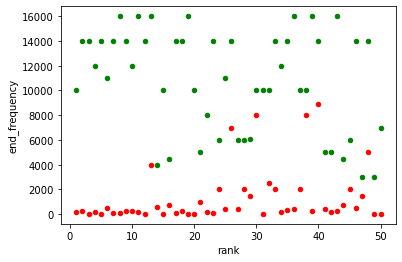

In [148]:
import matplotlib.pyplot as plt
for i in range(50):
    df_replica.iat[i,2] = int(df_replica.iat[i,2])
    df_replica.iat[i,3] = int(df_replica.iat[i,3])

ax = plt.gca()
df_replica.plot(kind='scatter',x = 'rank',y='start_frequency',color='green', ax = ax)
df_replica.plot(kind='scatter',x = 'rank',y='end_frequency',color='red', ax = ax)

 (c)

The Correlation Between Rank, Start Frequency, and End Frequency of Solar Flares

 (d)

There appears to be almost no correlation between the rank and the start frequency of solar flares, however, there seems to be a correlation between rank and end_frequency.

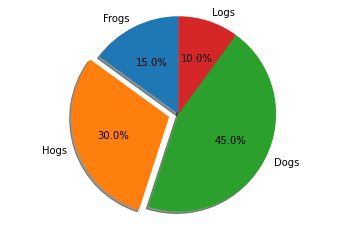